| Problem | Formula|Search Domain|
|---      |----    |----|
|ZDT1|${\text{Min}}={\begin{cases}f_{1}\left(x\right)=x_1\\h(f_1, g)= 1-\sqrt{f1/g} \\\end{cases}} \text{   where}, g(x) = 1+ \frac{9}{n-1}\sum_{i=2}^{n}x_i$|$0\leq{x_i}\leq{1}, i=2, ...n$|
|ZDT2|${\text{Min}}={\begin{cases}f_{1}\left(x\right)=x_1\\h(f_1, g)= 1-(f1/g)^2 \\\end{cases}} \text{  where}, g(x) = 1+ \frac{9}{n-1}\sum_{i=2}^{n}x_i$|$0\leq{x_i}\leq{1}, i=2, ...n$|
|ZDT3|${\text{Min}}={\begin{cases}f_{1}\left(x\right)=x_1\\h(f_1, g)= 1-\sqrt{f1/g}-(f_1/g)sin(10\pi f_1) \\\end{cases}} \text{   where}, g(x) = 1+ \frac{9}{n-1}\sum_{i=2}^{n}x_i$|$0\leq{x_i}\leq{1}, i=2, ...n$|
|VU1|${\text{Min}}={\begin{cases}f_{1}\left(x_1, x_2\right)=\frac{1}{x^2_1+x^2_2+1}\\f_{2}\left(x_1, x_2\right)={x^2_1+3x^2_2+1}\end{cases}}$|$-3\leq{x_1,x_2}\leq3$ |
|VU2|${\text{Min}}={\begin{cases}f_{1}\left(x_1, x_2\right)=x_1+x_2+1\\f_{2}\left(x_1, x_2\right)={x^2_1+2x^2_2-1}\end{cases}}$|$-3\leq{x_1,x_2}\leq3$ |
|Kur1|${\text{Min}}={\begin{cases}f_{1}\left(x_1,x_2,....,x_n\right)=\sum_{i=1}^{n-1}-10exp^{-0.2\sqrt{x^2_{i}+x^2_{i+1}}}\\f_{2}\left(x_1,x_2,....,x_n\right)=\sum^{n}_{i=1}\|x_i\|^{0.8}+5sinx_i^3\\\end{cases}}$|$-5.05\leq{x_i}\leq{5}, i=1..n$|
|TKLY1|${\text{Min}}={\begin{cases}f_{1}\left(x_1\right)=x_1+0.1\\f_{2}\left(x_1,x_2,x_3,x_4\right)={\frac{1}{x_1+0.1}\Pi_{i=2}^{4}[2.0-exp(-(\frac{x_i-0.1}{0.004})^2)-0.8exp(-(\frac{x_i-0.9}{0.4})^2)]}\end{cases}}$|$0\leq{x_1,x_2,x_3,x_4}\leq1$ |
|LTDZ1 |${\text{Maximum}}={\begin{cases}f_{1}\left(x_1,x_2,x_3\right)=3-(1+x_3)cos(x_1\pi/2)cos(x_2\pi/2)\\f_{2}\left(x_1,x_2,x_3\right)=3-(1+x_3)cos(x_1\pi/2)sin(x_2\pi/2)\\f_{3}\left(x_1,x_3\right)=3-(1+x_3)sin(x_1\pi/2)\end{cases}}$|$0\leq{x_1,x_2,x_3}\leq1$|
|SK2 |${\text{Maximum}}={\begin{cases}f_{1}\left(x\right)=-(x_1-2)^2-(x_2+3)^2-(x_3-5)^2-(x_4-4)^2+5\\f_{2}\left(x\right)={\frac{sinx_1+sinx_2+sinx_3+sinx_4}{1+(x_1^2+x_2^2+x_3^2+x_4^2)/100}}\end{cases}}$|$-10\leq{x_i}\leq{10}, i=1..4$|
|SK2_typo|${\text{Maximum}}={\begin{cases}f_{1}\left(x\right)=-(x_1-2)^2-(x_2-3)^2-(x_3-5)^2-(x_4-4)^2+5\\f_{2}\left(x\right)={\frac{sinx_1+sinx_2+sinx_3+sinx_4}{1+(x_1^2+x_2^2+x_3^2+x_4^2)/100}}\end{cases}}$|$-10\leq{x_i}\leq{10}, i=1..4$|



# Kur1

In [152]:
import time 
from pymoo.indicators.hv import Hypervolume
from pymoo.factory import get_performance_indicator
import sys 
sys.path.append('/Users/wuyoscar/Documents/Project/MOOP/Result')

ref_point = None
def calculate_hv(result):
    path = result['path']
    path = os.path.join(os.path.dirname(os.getcwd()),result['path'])
    F = np.loadtxt(path)
    metric = Hypervolume(nds=True,ref_point = ref_point,norm_ref_point=False)
    start_time = time.time()
    hv = metric.do(F)
    exc_time = time.time() - start_time
    return [hv,exc_time]
def hv_result(result):
    get = result.apply(calculate_hv, axis=1)
    df = pd.DataFrame(get.tolist(), columns = ['hv','hv_exc_time'])
    final_result = pd.concat([result, df],axis=1)
    output_result = final_result[['Problem', 'Alg_name', 'Iteration', 'Objectives', 'n_variables',
    'exec_time', 'hv',
    'hv_exc_time',]]
    return output_result

def nadir_deal_point(result):
    path = result['solution_path']
    path = os.path.join(os.path.dirname(os.getcwd()),result['path'])
    F = np.loadtxt(path)
    approx_ideal = F.min(axis=0)
    approx_nadir = F.max(axis=0)
    return [approx_ideal,approx_nadir]
def nadir_deal_point_result(result):
    get = result.apply(nadir_deal_point, axis=1)
    df = pd.DataFrame(get.tolist(), columns = ['approx_ideal','approx_nadir'])
    final_result = pd.concat([result, df],axis=1)
    return final_result

def igd(result):
    path = result['solution_path']
    F = np.loadtxt(path)
    igd_plus = get_performance_indicator("igd+", pf)
    igd_value = igd_plus.do(F)
    return igd_value

In [144]:
import pandas as pd 
import numpy as np, os ,sys 
from matplotlib import pyplot as plt 

pd.set_option('display.max_rows', None)
result = pd.read_csv('/Users/wuyoscar/Documents/Project/MOOP/Result/Kursawe_Result')
print(f"The number of records {len(result)}")

result.loc[:,'path'] = result['path'].str[29:].values
result.loc[:,'approx_nadir'] = result['approx_nadir'].str[1:-1].values
result = result.drop(columns=['xl','xu'])
kur1_2 = result.loc[result['n_variables']==2].reset_index(drop=True)
kur1_3 = result.loc[result['n_variables']==3].reset_index(drop=True)
kur1_4 = result.loc[result['n_variables']==4].reset_index(drop=True)
kur1_5 = result.loc[result['n_variables']==5].reset_index(drop=True)


The number of records 384


# Kur1 with two variables

In [167]:
nadir_arr  = np.array([np.fromstring(i, dtype=float, sep=' ') for i in np.array(kur1_2['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.max(nadir_arr, axis=0)}')

# if reference point is [-7.20461677  0.18111135]
ref_point = np.array([-7, 0])
hv_result(kur1_2)

Global nadir point for kur1 with two variables is :[-7.20461677  0.18111135]


,Problem,Alg_name,Iteration,Objectives,n_variables,exec_time,hv,hv_exc_time
0,KUR1,NSGA2,100,2,2,0.706093,7.981814,0.001222
1,KUR1,NSGA2,100,2,2,1.114796,8.029370,0.001564
2,KUR1,NSGA2,100,2,2,1.839076,8.045389,0.002161
3,KUR1,NSGA2,100,2,2,4.704647,8.060648,0.004439
4,KUR1,NSGA2,200,2,2,1.255795,7.976087,0.000674
5,KUR1,NSGA2,200,2,2,3.437348,8.031970,0.001232
6,KUR1,NSGA2,200,2,2,4.792598,8.047937,0.001719
7,KUR1,NSGA2,500,2,2,2.918540,7.976440,0.000541
8,KUR1,NSGA2,1000,2,2,5.599720,7.983307,0.000564
9,KUR1,NSGA2,500,2,2,5.564143,8.033588,0.001269


In [168]:
ref_point = np.array([-1, 5])
hv_result(kur1_2)

,Problem,Alg_name,Iteration,Objectives,n_variables,exec_time,hv,hv_exc_time
0,KUR1,NSGA2,100,2,2,0.706093,99.462995,0.000955
1,KUR1,NSGA2,100,2,2,1.114796,99.511512,0.002593
2,KUR1,NSGA2,100,2,2,1.839076,99.542717,0.002084
3,KUR1,NSGA2,100,2,2,4.704647,99.568636,0.003645
4,KUR1,NSGA2,200,2,2,1.255795,99.482654,0.000618
5,KUR1,NSGA2,200,2,2,3.437348,99.521776,0.002029
6,KUR1,NSGA2,200,2,2,4.792598,99.552949,0.001857
7,KUR1,NSGA2,500,2,2,2.918540,99.483692,0.000752
8,KUR1,NSGA2,1000,2,2,5.599720,99.490622,0.000681
9,KUR1,NSGA2,500,2,2,5.564143,99.541332,0.001395


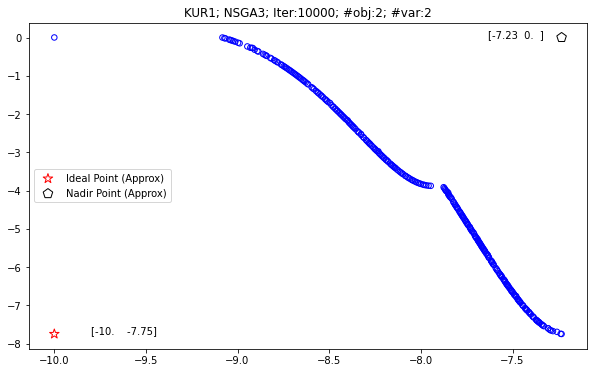

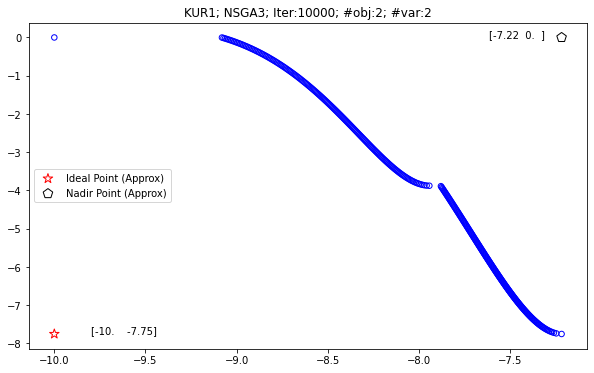

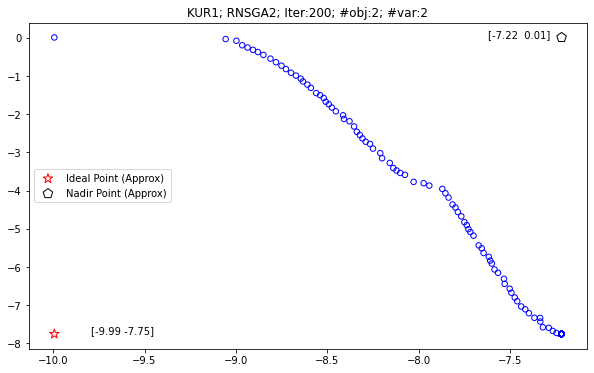

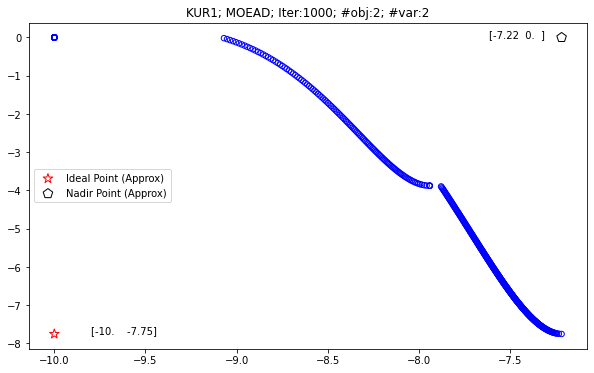

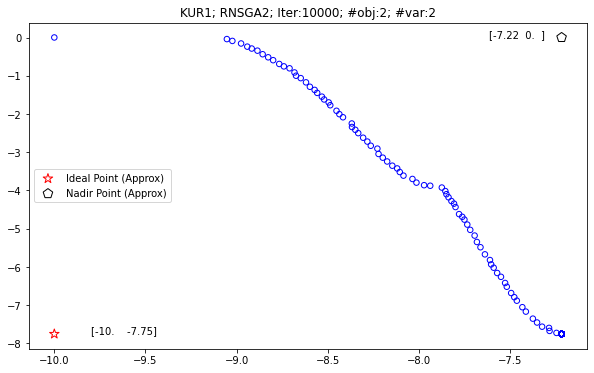

In [161]:
for i in range(len(kur1_2)-5,len(kur1_2)): #only show five figures
    path = os.path.join(os.path.dirname(os.getcwd()),kur1_2['path'][i])
    F = np.loadtxt(path)
    approx_ideal = F.min(axis=0)
    approx_nadir = F.max(axis=0)
    plt.figure(figsize=(10, 6))
    plt.text(approx_ideal[0]+0.2, approx_ideal[1], str(np.round(approx_ideal,2)))
    plt.text(approx_nadir[0]-0.4, approx_nadir[1], str(np.round(approx_nadir,2)))
    plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
    plt.scatter(approx_ideal[0], approx_ideal[1], facecolors='none', edgecolors='red', marker="*", s=100, label="Ideal Point (Approx)")
    plt.scatter(approx_nadir[0], approx_nadir[1], facecolors='none', edgecolors='black', marker="p", s=100, label="Nadir Point (Approx)")
    plt.title(f"{kur1_2['Problem'][i]}; {kur1_2['Alg_name'][i]}; Iter:{kur1_2['Iteration'][i]}; #obj:{kur1_2['Objectives'][i]}; #var:{kur1_2['n_variables'][i]}")
    plt.legend()
    plt.show()




# Kur1 with three variables

In [171]:
nadir_arr  = np.array([np.fromstring(i, dtype=float, sep=' ') for i in np.array(kur1_3['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.max(nadir_arr, axis=0)}')

# if reference point is approx nadir point 
ref_point = np.array([-14, 0.7])
hv_result(kur1_3)

Global nadir point for kur1 with two variables is :[-14.4193493    0.62975673]


,Problem,Alg_name,Iteration,Objectives,n_variables,exec_time,hv,hv_exc_time
0,KUR1,NSGA2,100,2,3,0.671555,35.203094,0.001408
1,KUR1,NSGA2,100,2,3,1.240202,35.372392,0.001088
2,KUR1,NSGA2,200,2,3,2.112187,35.387279,0.001197
3,KUR1,NSGA2,200,2,3,3.428038,35.445774,0.001654
4,KUR1,NSGA2,200,2,3,1.525498,35.237898,0.000530
5,KUR1,NSGA2,100,2,3,2.323885,35.432214,0.001671
6,KUR1,NSGA2,200,2,3,6.555444,35.479872,0.003769
7,KUR1,NSGA2,100,2,3,4.059015,35.468476,0.002942
8,KUR1,NSGA2,500,2,3,8.208682,35.448501,0.004249
9,KUR1,NSGA2,500,2,3,3.101846,35.234973,0.000700


In [181]:
ref_point = np.array([-1, 5])
hv_result(kur1_3)

,Problem,Alg_name,Iteration,Objectives,n_variables,exec_time,hv,hv_exc_time
0,KUR1,NSGA2,100,2,3,0.671555,277.058264,0.000759
1,KUR1,NSGA2,100,2,3,1.240202,277.283664,0.001390
2,KUR1,NSGA2,200,2,3,2.112187,277.327990,0.001942
3,KUR1,NSGA2,200,2,3,3.428038,277.394424,0.001776
4,KUR1,NSGA2,200,2,3,1.525498,277.143189,0.000560
5,KUR1,NSGA2,100,2,3,2.323885,277.334323,0.001622
6,KUR1,NSGA2,200,2,3,6.555444,277.409857,0.003669
7,KUR1,NSGA2,100,2,3,4.059015,277.293987,0.002933
8,KUR1,NSGA2,500,2,3,8.208682,277.400879,0.001624
9,KUR1,NSGA2,500,2,3,3.101846,277.184497,0.000541


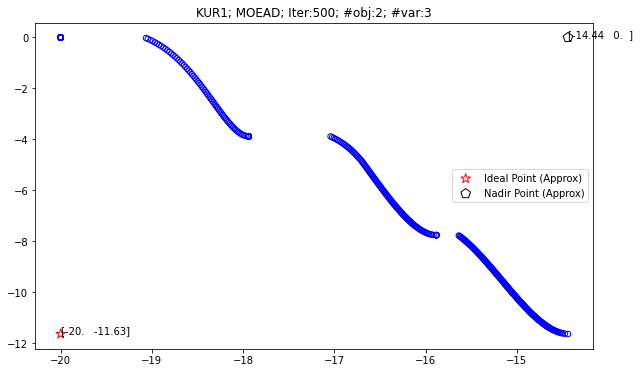

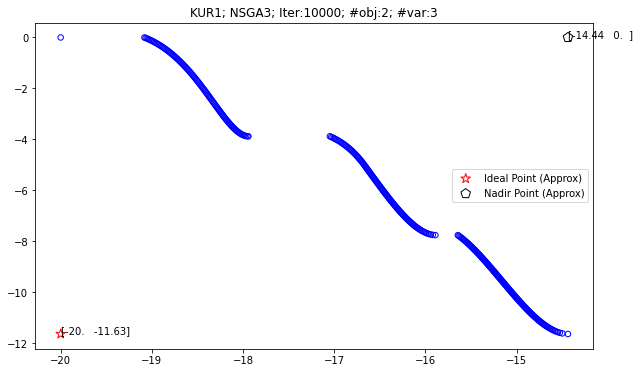

In [83]:
for i in range(len(kur1_3)-2,len(kur1_3)):
    path = os.path.join(os.path.dirname(os.getcwd()),kur1_3['path'][i])
    F = np.loadtxt(path)
    approx_ideal = F.min(axis=0)
    approx_nadir = F.max(axis=0)
    plt.figure(figsize=(10, 6))
    plt.text(approx_ideal[0], approx_ideal[1], str(np.round(approx_ideal,2)))
    plt.text(approx_nadir[0], approx_nadir[1], str(np.round(approx_nadir,2)))
    plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
    plt.scatter(approx_ideal[0], approx_ideal[1], facecolors='none', edgecolors='red', marker="*", s=100, label="Ideal Point (Approx)")
    plt.scatter(approx_nadir[0], approx_nadir[1], facecolors='none', edgecolors='black', marker="p", s=100, label="Nadir Point (Approx)")
    plt.title(f"{kur1_3['Problem'][i]}; {kur1_3['Alg_name'][i]}; Iter:{kur1_3['Iteration'][i]}; #obj:{kur1_3['Objectives'][i]}; #var:{kur1_3['n_variables'][i]}")
    plt.legend()
    plt.show()


# Kur1 with four variables

In [173]:
nadir_arr  = np.array([np.fromstring(i, dtype=float, sep=' ') for i in np.array(kur1_4['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.max(nadir_arr, axis=0)}')

# if reference point is approx nadir point 
ref_point = np.array([-21, 0.6])
hv_result(kur1_4)

Global nadir point for kur1 with two variables is :[-21.6321233    0.64481789]


,Problem,Alg_name,Iteration,Objectives,n_variables,exec_time,hv,hv_exc_time
0,KUR1,NSGA2,100,2,4,0.583442,72.083807,0.000748
1,KUR1,NSGA2,100,2,4,1.107823,72.586125,0.001157
2,KUR1,NSGA2,100,2,4,1.801603,72.734433,0.001742
3,KUR1,NSGA2,200,2,4,1.139482,72.150685,0.001642
4,KUR1,NSGA2,200,2,4,2.056444,72.662591,0.001124
5,KUR1,NSGA2,100,2,4,3.530957,72.834501,0.003050
6,KUR1,NSGA2,500,2,4,2.764918,72.286500,0.000569
7,KUR1,NSGA2,200,2,4,3.215449,72.792897,0.001700
8,KUR1,NSGA2,500,2,4,5.077372,72.703418,0.003178
9,KUR1,NSGA2,200,2,4,6.110002,72.900037,0.003563


In [180]:
ref_point = np.array([-1, 5])
hv_result(kur1_4)

,Problem,Alg_name,Iteration,Objectives,n_variables,exec_time,hv,hv_exc_time
0,KUR1,NSGA2,100,2,4,0.583442,521.314492,0.001043
1,KUR1,NSGA2,100,2,4,1.107823,521.894378,0.001691
2,KUR1,NSGA2,100,2,4,1.801603,522.222680,0.002357
3,KUR1,NSGA2,200,2,4,1.139482,521.732267,0.000906
4,KUR1,NSGA2,200,2,4,2.056444,522.255281,0.001774
5,KUR1,NSGA2,100,2,4,3.530957,522.219930,0.003865
6,KUR1,NSGA2,500,2,4,2.764918,521.931698,0.000628
7,KUR1,NSGA2,200,2,4,3.215449,522.424593,0.001693
8,KUR1,NSGA2,500,2,4,5.077372,522.359306,0.002017
9,KUR1,NSGA2,200,2,4,6.110002,522.477040,0.003283


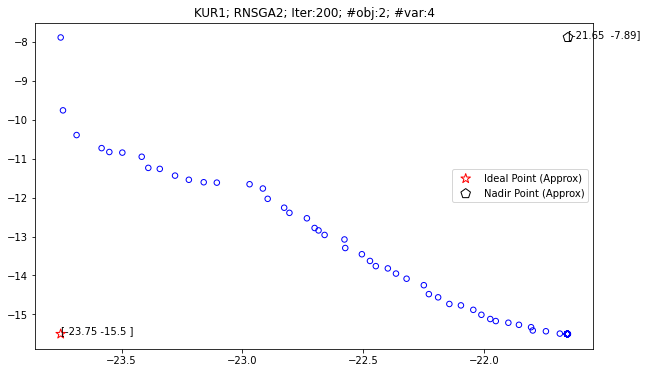

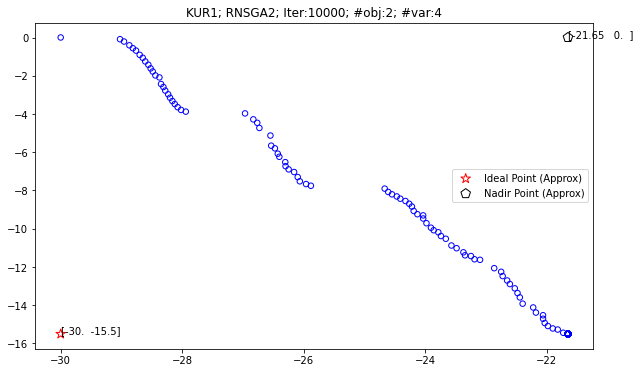

In [182]:
for i in range(len(kur1_4)-2,len(kur1_4)):
    path = os.path.join(os.path.dirname(os.getcwd()),kur1_4['path'][i])
    F = np.loadtxt(path)
    approx_ideal = F.min(axis=0)
    approx_nadir = F.max(axis=0)
    plt.figure(figsize=(10, 6))
    plt.text(approx_ideal[0], approx_ideal[1], str(np.round(approx_ideal,2)))
    plt.text(approx_nadir[0], approx_nadir[1], str(np.round(approx_nadir,2)))
    plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
    plt.scatter(approx_ideal[0], approx_ideal[1], facecolors='none', edgecolors='red', marker="*", s=100, label="Ideal Point (Approx)")
    plt.scatter(approx_nadir[0], approx_nadir[1], facecolors='none', edgecolors='black', marker="p", s=100, label="Nadir Point (Approx)")
    plt.title(f"{kur1_4['Problem'][i]}; {kur1_4['Alg_name'][i]}; Iter:{kur1_4['Iteration'][i]}; #obj:{kur1_4['Objectives'][i]}; #var:{kur1_4['n_variables'][i]}")
    plt.legend()
    plt.show()


# Kur1 with five variables

In [178]:
nadir_arr  = np.array([np.fromstring(i, dtype=float, sep=' ') for i in np.array(kur1_5['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.max(nadir_arr, axis=0)}')

# if reference point is approx nadir point 
ref_point = np.array([-28, 0.8])
hv_result(kur1_5)

Global nadir point for kur1 with two variables is :[-28.84847323   0.85574357]


,Problem,Alg_name,Iteration,Objectives,n_variables,exec_time,hv,hv_exc_time
0,KUR1,NSGA2,100,2,5,0.577569,124.567686,0.000715
1,KUR1,NSGA2,100,2,5,1.069417,125.499034,0.001797
2,KUR1,NSGA2,500,2,5,3.912556,125.020034,0.000664
3,KUR1,NSGA2,200,2,5,8.647043,126.070159,0.002874
4,KUR1,NSGA2,500,2,5,7.360329,125.763318,0.000989
5,KUR1,NSGA2,200,2,5,1.104577,124.909854,0.000509
6,KUR1,NSGA2,500,2,5,8.942782,125.984976,0.002209
7,KUR1,NSGA2,100,2,5,1.677887,125.599621,0.001823
8,KUR1,NSGA2,200,2,5,2.440706,125.673106,0.001165
9,KUR1,NSGA2,200,2,5,3.917310,125.828982,0.002027


In [179]:
ref_point = np.array([-1, 5])
hv_result(kur1_5)

,Problem,Alg_name,Iteration,Objectives,n_variables,exec_time,hv,hv_exc_time
0,KUR1,NSGA2,100,2,5,0.577569,831.688689,0.001038
1,KUR1,NSGA2,100,2,5,1.069417,833.247188,0.001896
2,KUR1,NSGA2,500,2,5,3.912556,833.561605,0.000705
3,KUR1,NSGA2,200,2,5,8.647043,833.968754,0.003676
4,KUR1,NSGA2,500,2,5,7.360329,834.349437,0.002086
5,KUR1,NSGA2,200,2,5,1.104577,832.978603,0.000648
6,KUR1,NSGA2,500,2,5,8.942782,834.464277,0.001849
7,KUR1,NSGA2,100,2,5,1.677887,833.241239,0.001648
8,KUR1,NSGA2,200,2,5,2.440706,834.123071,0.001165
9,KUR1,NSGA2,200,2,5,3.917310,833.513160,0.001776


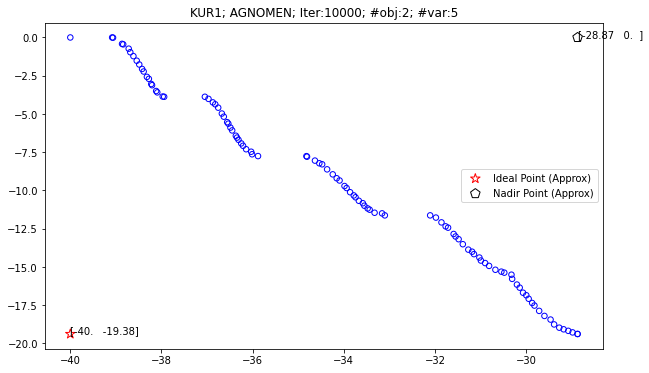

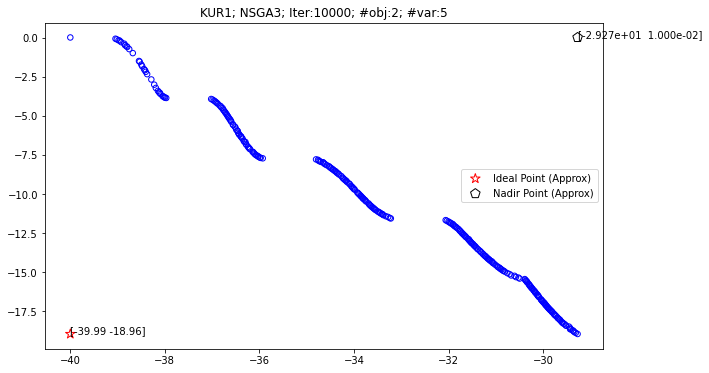

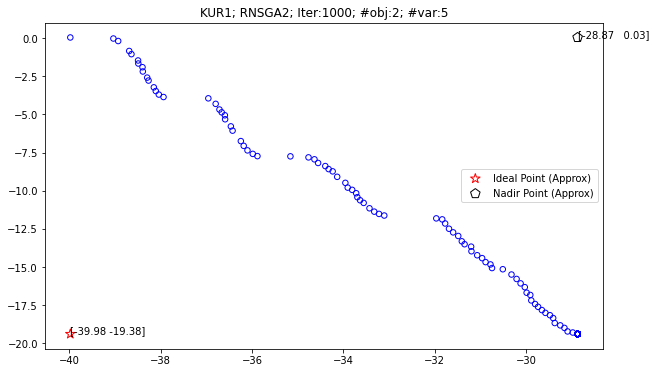

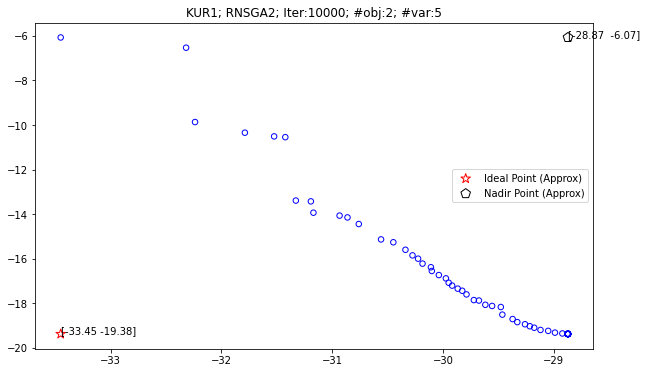

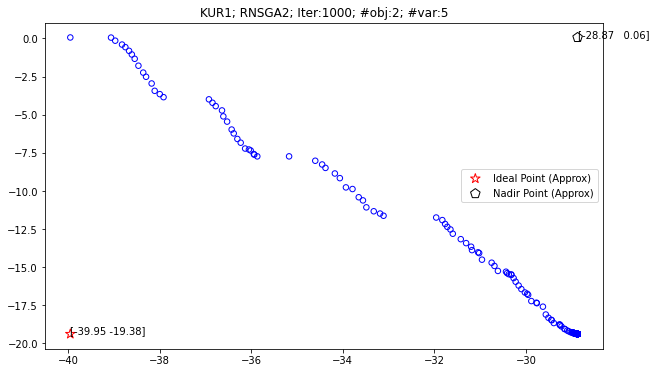

In [86]:
for i in range(len(kur1_5)-5,len(kur1_5)):
    path = os.path.join(os.path.dirname(os.getcwd()),kur1_5['path'][i])
    F = np.loadtxt(path)
    approx_ideal = F.min(axis=0)
    approx_nadir = F.max(axis=0)
    plt.figure(figsize=(10, 6))
    plt.text(approx_ideal[0], approx_ideal[1], str(np.round(approx_ideal,2)))
    plt.text(approx_nadir[0], approx_nadir[1], str(np.round(approx_nadir,2)))
    plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
    plt.scatter(approx_ideal[0], approx_ideal[1], facecolors='none', edgecolors='red', marker="*", s=100, label="Ideal Point (Approx)")
    plt.scatter(approx_nadir[0], approx_nadir[1], facecolors='none', edgecolors='black', marker="p", s=100, label="Nadir Point (Approx)")
    plt.title(f"{kur1_5['Problem'][i]}; {kur1_5['Alg_name'][i]}; Iter:{kur1_5['Iteration'][i]}; #obj:{kur1_5['Objectives'][i]}; #var:{kur1_5['n_variables'][i]}")
    plt.legend()
    plt.show()

In [201]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_problem
from pymoo.optimize import minimize

problem = get_problem("kursawe")

algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ('n_gen', 10),
               seed=1,
               verbose=True,
               save_history = True)

n_gen |  n_eval |     igd      |      gd      |      hv     
    1 |     100 |  0.381931742 |  0.343708945 |  0.069876549
    2 |     200 |  0.361848667 |  0.488105464 |  0.087376178
    3 |     300 |  0.225281258 |  0.096261745 |  0.181003894
    4 |     400 |  0.161379850 |  0.144207630 |  0.230976090
    5 |     500 |  0.116881276 |  0.096496751 |  0.248132645
    6 |     600 |  0.093527895 |  0.074284885 |  0.288990086
    7 |     700 |  0.064810006 |  0.055412133 |  0.320681400
    8 |     800 |  0.055282254 |  0.047839632 |  0.328875944
    9 |     900 |  0.043622327 |  0.040845413 |  0.337905201
   10 |    1000 |  0.030052951 |  0.028306349 |  0.356821001


In [203]:
for algo in res.history:

    # store the number of function evaluations
    print(algo.evaluator.n_eval)

100
200
300
400
500
600
700
800
900
1000


In [204]:
res.history[-1].evaluator.n_eval

1000